In [1]:
import numpy as np
from tqdm import tqdm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# distance and its tests
def distance(node_1, node_2):
    ''' Distance from node_1 to node_2 via the base graph '''
    if node_1 >= node_2: return node_1 - node_2
    else: return N - node_2 + node_1

# some simple tests for the distance    
N = 5
assert distance(4, 3) == 1
assert distance(0, 4) == 1
assert distance(3, 4) == 4
assert distance(1, 4) == 2

In [3]:
def navigation(source, destination, shortcuts):
    ''' Perform greedy routing on the ring graph s->d using shortcuts or base graph '''
    
    # initial vertex
    current_vertex = source
    
    # path
    path = [current_vertex]
    
    # waiting until done
    while current_vertex != destination:
        # going down or via the shortcut
        option_0 = (current_vertex - 1) % N
        option_1 = shortcuts[current_vertex]
        
        # all options
        options = [option_0, option_1]
        
        # distances from option to destination
        distances = [distance(x, destination) for x in options]
        
        # GREEDY: choosing the least distance
        choice = options[np.argmin(distances)]
        
        # updating current vertex
        current_vertex = choice
        path.append(current_vertex)
        
    # returing path
    return path

# simple tests
N = 5

# all lead to 0
shortcuts = [0, 0, 0, 0, 0]
assert navigation(4, 0, shortcuts) == [4, 0]

# all lead to 4
shortcuts = [4, 4, 4, 4, 4]
assert navigation(4, 0, shortcuts) == [4, 3, 2, 1, 0]

# shortcut 3->1
shortcuts = [4, 4, 4, 1, 4]
assert navigation(4, 0, shortcuts) == [4, 3, 1, 0]

In [4]:
def get_tau(shortcuts, repetitions = 100):
    ''' Perform routing from random to random points using shortcuts and return routing times '''
    results = []
    for i in range(repetitions):
        source = np.random.choice(range(N))
        destination = np.random.choice(range(N))
        t = navigation(source, destination, shortcuts)
        results.append(len(t))
    return results

In [5]:
def rewire_1(shortcuts, p):
    # choosing source and destination at random
    source = np.random.choice(range(N))
    destination = np.random.choice(range(N))
    
    # doing nothing in degenerate case
    if source == destination:
        return np.copy(shortcuts)
    
    # performing a greedy walk
    walk = navigation(source, destination, shortcuts)
    
    # choosing vertices to rewire
    do_rewire = np.random.rand(len(walk)) <= p
    
    # creating a copy of shortcuts
    new_shortcuts = np.copy(shortcuts)
    
    # rewiring vertices
    for i, vertex in enumerate(walk):
        # if selected with prob. p, set to destination
        if do_rewire[i]: new_shortcuts[vertex] = destination
            
    # returning result
    return new_shortcuts

In [11]:
# number of vertices in the ring graph
# Vertices: 0, ..., N-1
# connections (base graph): x+1 -> x and 0 -> N - 1
# + shortcuts
N = 20000

# choosing the rewiring probability
p = 0.1

# choosing random shortcuts
shortcuts = np.random.choice(range(N), N)

# choosing number of repetitions for tau estimation
repetitions = 500

# choosing number of rewirings
rewirings = 3000

# experiment
tau_means = []
tau_stds = []

# estimate tau each K iterations
K = 500

for i in tqdm(range(rewirings)):
    if i % K == 0:
        tau = get_tau(shortcuts, repetitions = repetitions)
        tau_means.append(np.mean(tau))
        tau_stds.append(np.std(tau))
    #print('Iteration %d, tau = %f' % (i, tau_mean))
    shortcuts = rewire_1(shortcuts, p)

100%|██████████| 3000/3000 [01:58<00:00, 25.40it/s]


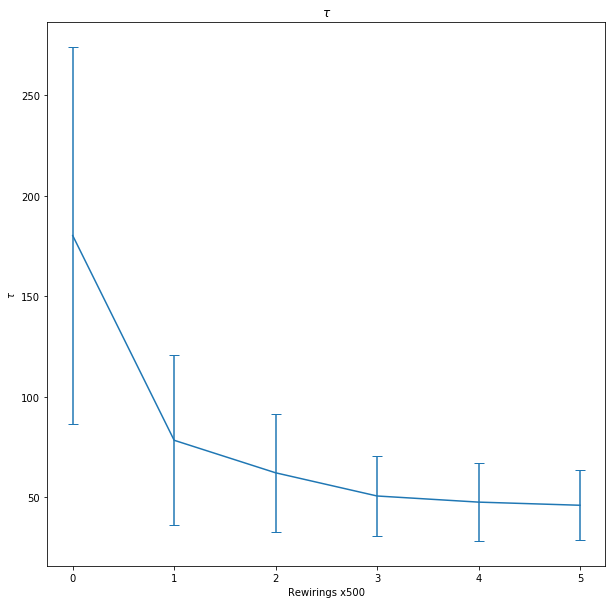

In [16]:
plt.figure(figsize = (10, 10))
plt.title('Greedy routing time vs. rewiring')
plt.title('$\\tau$')
plt.xlabel('Rewirings x' + str(K))
plt.ylabel('$\\tau$')
plt.errorbar(range(len(tau_means)), tau_means, yerr = tau_stds, capsize = 5)
plt.show()